In [ ]:
import cv2
import os
import tensorflow as tf
from keras.utils import img_to_array, load_img
from keras.models import load_model
import numpy as np

#Mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:


model_file ='/content/gdrive/MyDrive/EEG_project/Emotion_detection_using_video /Model/emotion_model2.h5'
model = tf.keras.models.load_model(model_file)
#here change the input shape of the image so it can fit in the model, from (1,48,48,1) to (48,48,1)
model.layers[0].batch_input_shape = (48, 48, 1)

print(model.summary())




Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │          28,6

 Total params: 16,844,617 (64.26 MB)

 Trainable params: 16,844,615 (64.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [ ]:
batchSize= 32

#get categories
print("Categories: ")

# Define categories
categories = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Get categories from dictionary
categories_list = list(categories.values())

print(categories_list)  # Print list of categories
numOfClasses = len(categories_list)
print("Number of classes: ", numOfClasses)

Categories: 
['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Surprised']
Number of classes:  7


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
#find the face inside an image using haarCascade
def findFace(pathForImage):
  image= cv2.imread(pathForImage)
  gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  haarCascadeFile='/content/gdrive/MyDrive/EEG_project/Emotion_detection_using_video /haarcascade_frontalface_default.xml'
  face_cascade=cv2.CascadeClassifier(haarCascadeFile)
  faces= face_cascade.detectMultiScale(gray)

  for(x,y,w,h) in faces:
    #cv2.rectangle(gray, (x,y), (x+w, y+h), (255,0,0), 2) #just testing here
    #roi = region of interest
    roi_gray= gray[y:y+h, x:x+w]
    roi_gray= cv2.resize(roi_gray, (48,48))
  return roi_gray







In [ ]:
def prepareImage(faceImage):
  # convert to array and normalize
  imgResult = img_to_array(faceImage)
  imgResult = np.expand_dims(imgResult, axis=0)
  imgResult = imgResult/255.0

  # Add a channel dimension if necessary (for grayscale images)
  if imgResult.shape[-1] == 1: # If grayscale
    imgResult = np.repeat(imgResult, 3, axis=-1) # Repeat to 3 channels

  return imgResult

(48, 48)


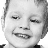

In [ ]:
#test image
testImagePath = "/content/gdrive/MyDrive/EEG_project/Emotion_detection_using_video /happy_child.jpg"
faceGrayImage = findFace(testImagePath)
#print the shape of gray image
print(faceGrayImage.shape)
cv2_imshow(faceGrayImage)

In [ ]:

imgForModel = prepareImage(faceGrayImage)

#Run the prediction
prediction = model.predict(imgForModel, verbose=1)


 # Print prediction probabilities for all labels
for i, prob in enumerate(prediction[0]):
   print(f"{categories[i]}: {prob:.4f}")


# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the predicted emotion label
predicted_emotion = categories[predicted_class_index]

# Print the prediction results
print("Prediction Probabilities:", prediction)
print("Predicted Class Index:", predicted_class_index)
print("Predicted Emotion:", predicted_emotion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
Angry: 0.0000
Disgusted: 0.0000
Fearful: 0.0000
Happy: 0.9980
Neutral: 0.0020
Sad: 0.0000
Surprised: 0.0000
Prediction Probabilities: [[1.6934526e-07 3.2744176e-14 6.0461973e-09 9.9802160e-01 1.9734988e-03
  3.0601595e-07 4.4039980e-06]]
Predicted Class Index: 3
Predicted Emotion: Happy


In [ ]:
# Function to process a video file
def process_video(video_path):
    all_predictions = []  # Danh sách để lưu trữ tất cả các dự đoán
    #Opens the video using cv2.VideoCapture
    cap = cv2.VideoCapture(video_path)
    frames=[] #Store processed frames

    #Loops through each frame of the video
    while cap.isOpened():
        ret, frame = cap.read()  #ret is a boolean var (True if read success)

        if not ret:
            break

        # Convert frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Find face in the frame
        haarCascadeFile='/content/gdrive/MyDrive/EEG_project/Emotion_detection_using_video /haarcascade_frontalface_default.xml'
        face_cascade=cv2.CascadeClassifier(haarCascadeFile)
        # detect faces available
        num_faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)




        for (x,y,w,h) in num_faces:
           # region of interest
            roi_gray= gray_frame[y:y+h, x:x+w]
            roi_gray= cv2.resize(roi_gray, (48,48))
            face_gray_image= roi_gray

            # Prepare image for model
            img_for_model = prepareImage(face_gray_image)

            # Run prediction
            prediction = model.predict(img_for_model, verbose=0)

            # Lưu dự đoán vào danh sách
            frame_predictions = []
            for i, prob in enumerate(prediction[0]):
                frame_predictions.append({categories[i]: prob})
            all_predictions.append(frame_predictions)

            # Get predicted emotion (still keep this if you need it)
            predicted_class_index = np.argmax(prediction)
            predicted_emotion = categories[predicted_class_index]

            # Display predicted emotion on frame
            cv2.putText(frame, predicted_emotion, (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        #Append processed frame
        frames.append(frame)

        # Display the resulting frame
        #cv2_imshow(frame)

        #if cv2.waitKey(1) & 0xFF == ord('q'):
            #break

    cap.release()
    return frames
    #cv2.destroyAllWindows()

# Replace with your video path
#video_path = "/content/gdrive/MyDrive/EEG_project/Emotion_detection_using_video /video1.mp4"
#process_video(video_path)

Process the video and convert frames to a video file:

In [ ]:
import os

video_path = "/content/gdrive/MyDrive/EEG_project/Emotion_detection_using_video /Dataset/s03/s03_trial11.mp4"
processed_frames = process_video(video_path)

# Get video properties
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
cap.release()

# Define output video path
output_video_path = "s03_trial11_video.mp4"
# NOTE : the video is directly saved in cloud TPU, this mean it's temporary, can be deleted.
# PLEASE download the video (In Colab's left sidebar, open the "Files" tab (folder icon)).

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use appropriate codec
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
# Write frames to output video
for frame in processed_frames:
    out.write(frame)

out.release()